<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Feature_Selection_Alpha_O2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/Alpha_REM_NREM_O2.csv")
X = data.iloc[:,1:] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [18]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)

In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [21]:
featureScores

,Specs,Score
0,MeanP_Alpha_O2,1.913752
1,MedianF_Alpha_O2,218.817122
2,MeanF_Alpha_O2,333.296001
3,Spectral Edge_Alpha_O2,400.231243
4,PeakF_Alpha_O2,199.647720


In [22]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs       Score
3  Spectral Edge_Alpha_O2  400.231243
2          MeanF_Alpha_O2  333.296001
1        MedianF_Alpha_O2  218.817122
4          PeakF_Alpha_O2  199.647720
0          MeanP_Alpha_O2    1.913752


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                    Specs       Score
3  Spectral Edge_Alpha_O2  400.231243
2          MeanF_Alpha_O2  333.296001
1        MedianF_Alpha_O2  218.817122
4          PeakF_Alpha_O2  199.647720
0          MeanP_Alpha_O2    1.913752


In [24]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.33672953 0.15931831 0.15127621 0.1504917  0.20218424]


In [25]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

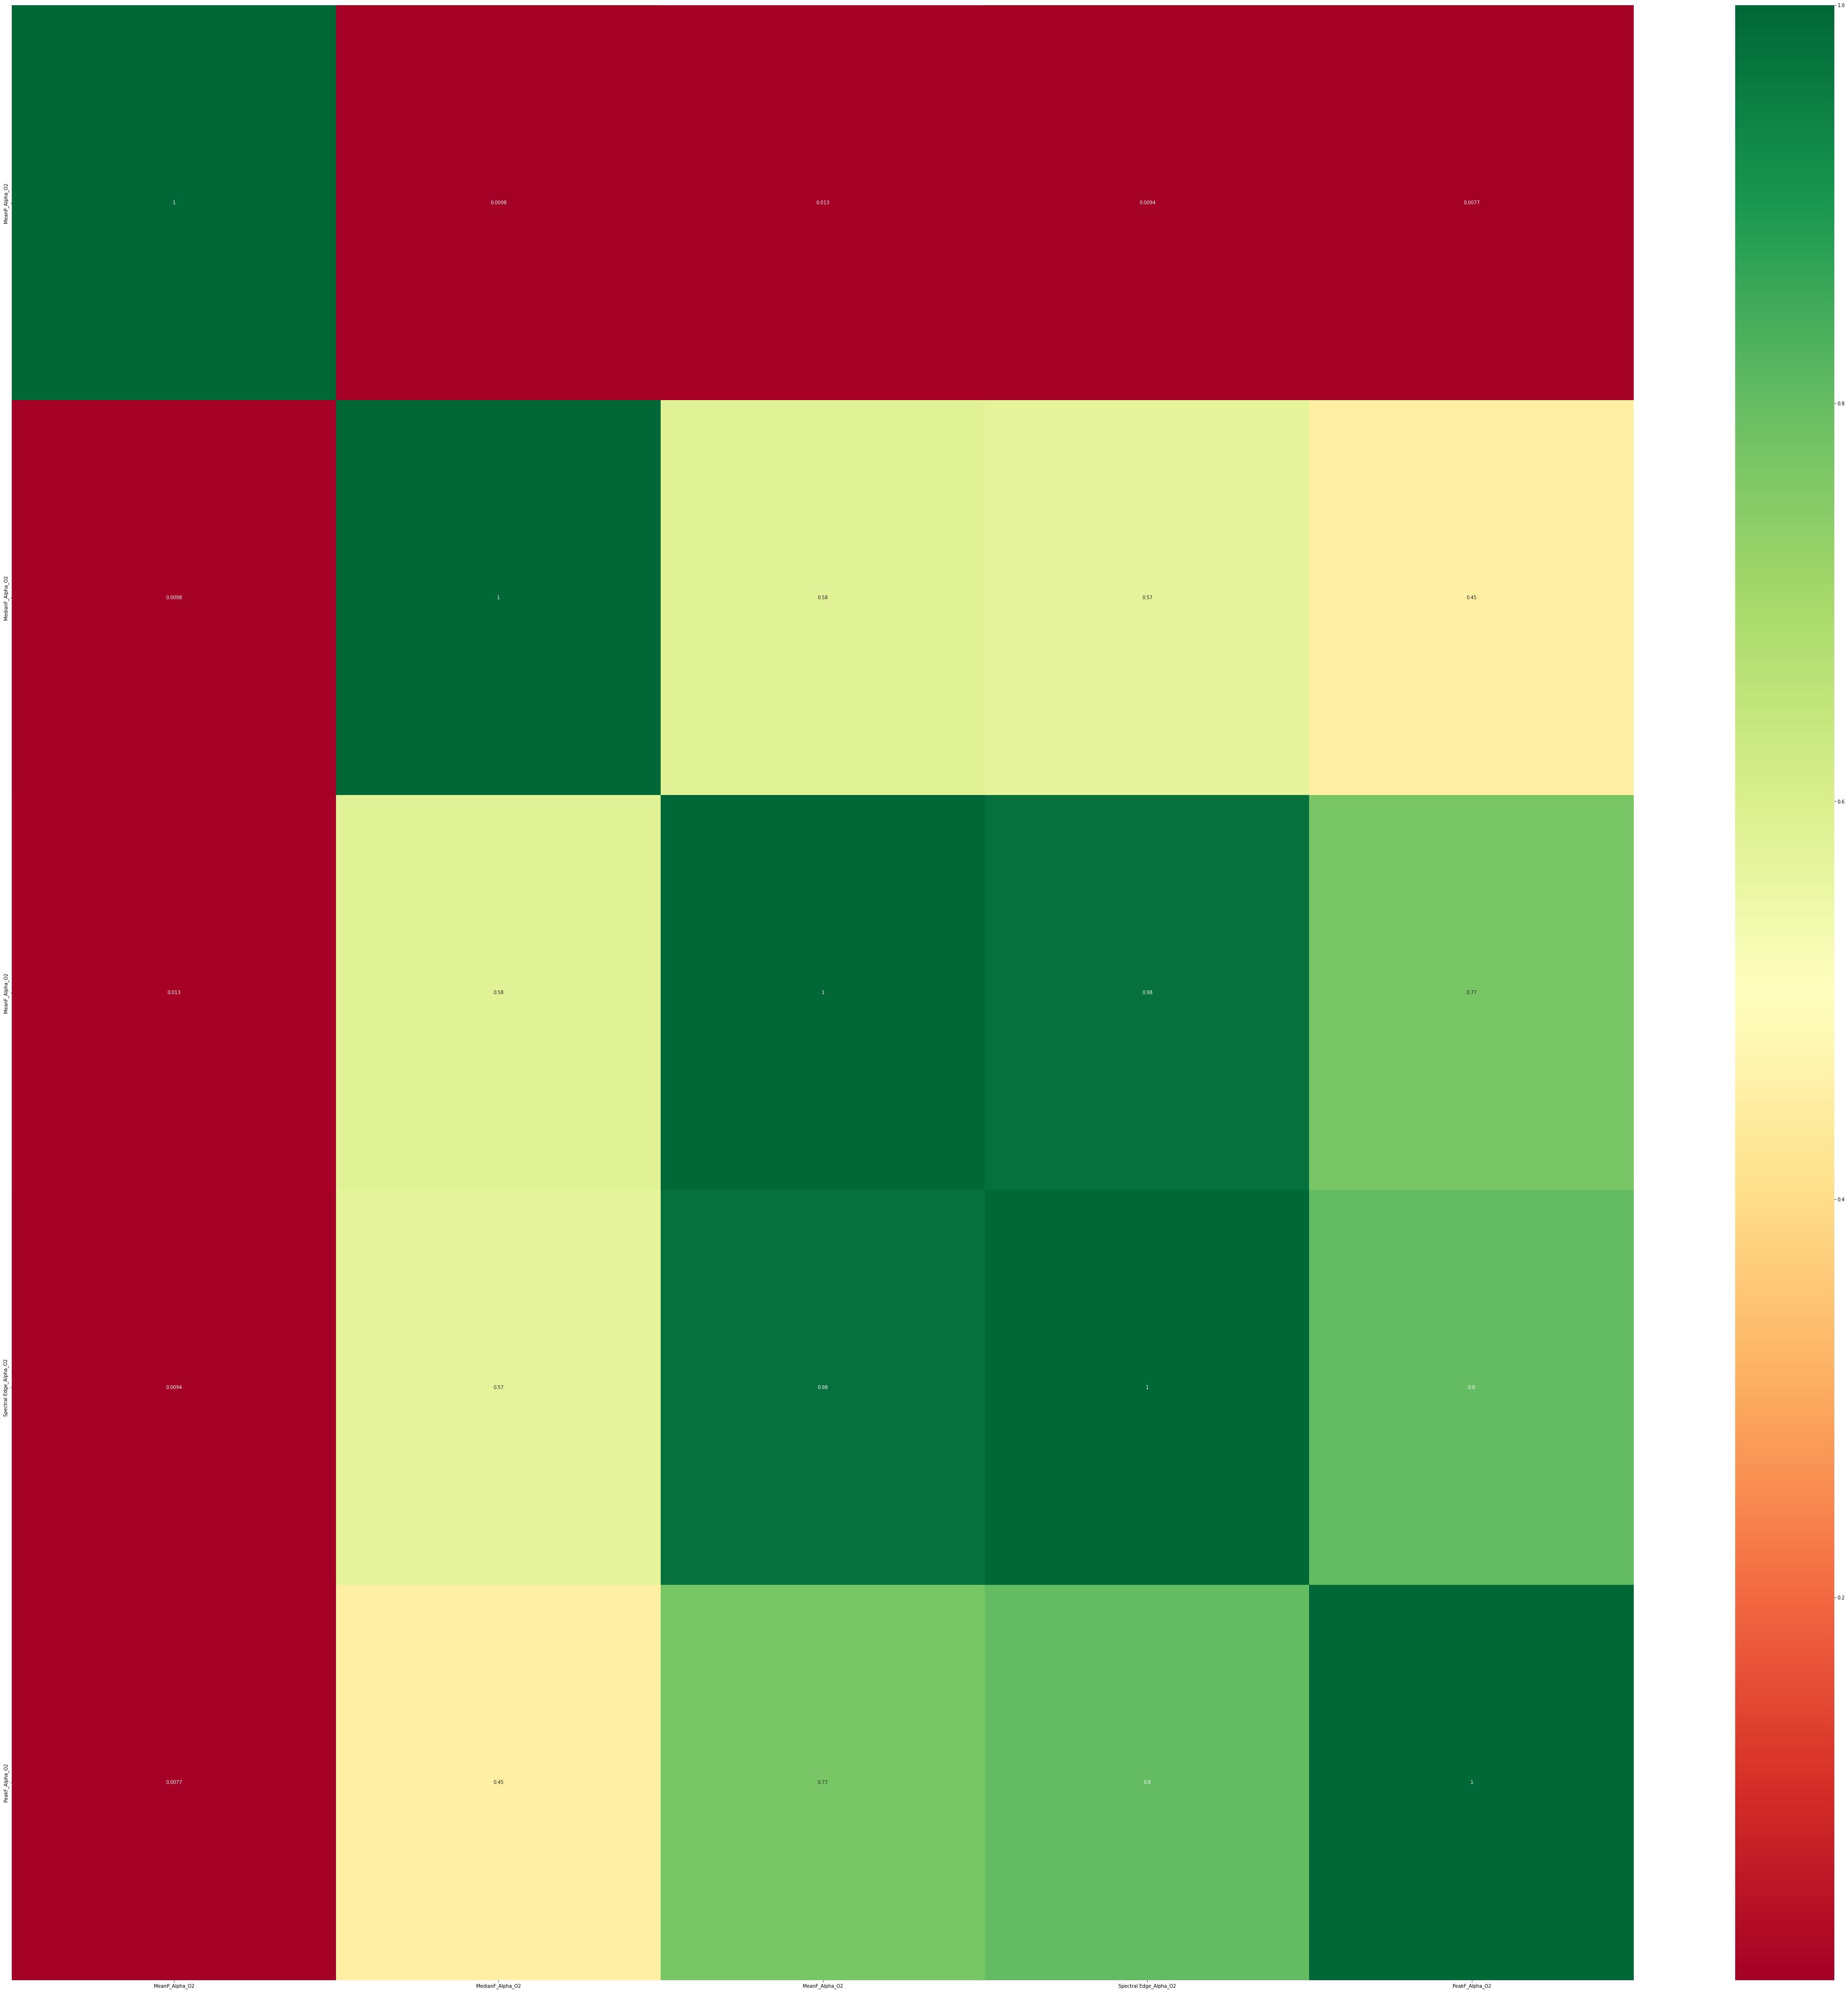

In [26]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation